### Author: Viraj Nayak

## Task 1
## Grip Feb'21

## Prediction using Supervised ML
Predict the percentage of an student based on the no. of study hours.

#### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Reading data from remote link

In [2]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


#### Plotting the data  

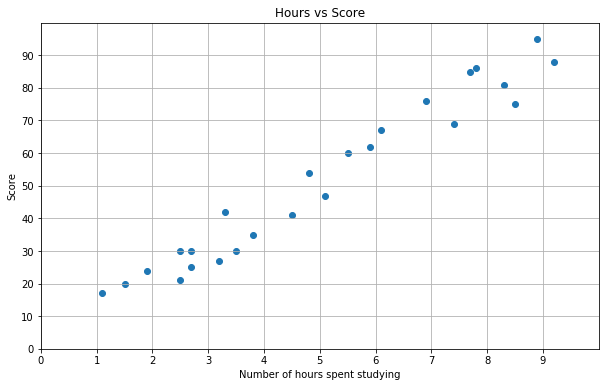

In [3]:
plt.figure(figsize=(10,6))
plt.scatter(df.Hours.values,df.Scores.values)
plt.xlabel('Number of hours spent studying')
plt.ylabel('Score')
plt.title('Hours vs Score')
plt.xlim((0,10))
plt.ylim((0,100))
plt.xticks(np.arange(0,10,1))
plt.yticks(np.arange(0,100,10))
plt.grid()
plt.show()

From the graph above, it can seen that there is a positive linear relation between the number of hours spent studying and percentage of score.

#### Preparing the data

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
# Since the data is low, I have kept the test size very small. 
x_train, x_test, y_train, y_test = train_test_split(df.Hours.values.reshape(-1,1),df.Scores.values.reshape(-1,1),
                                                    test_size = 0.1, random_state = 101)

#### Training the Algorithm

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
LR = LinearRegression()

In [8]:
LR.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Prediction and visualizion for testing data

In [9]:
y_prd = LR.predict(x_test)

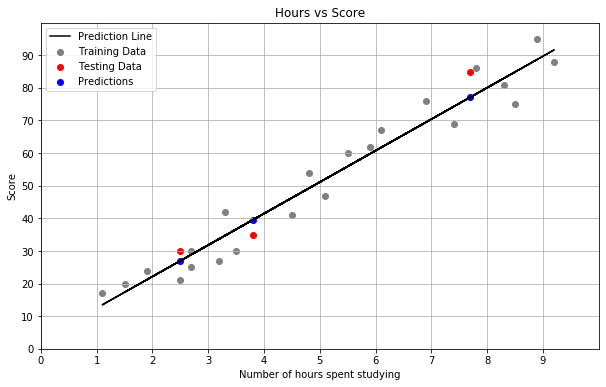

In [10]:
plt.figure(figsize=(10,6))
plt.scatter(x_train,y_train,color='grey',label = 'Training Data')
plt.plot(x_train,LR.coef_*x_train+LR.intercept_,color = 'black',label = 'Prediction Line')
plt.scatter(x_test,y_test,color='r',label = 'Testing Data')
plt.scatter(x_test,y_prd,color='blue',label = 'Predictions')
plt.xlabel('Number of hours spent studying')
plt.ylabel('Score')
plt.title('Hours vs Score')
plt.xlim((0,10))
plt.ylim((0,100))
plt.xticks(np.arange(0,10,1))
plt.yticks(np.arange(0,100,10))
plt.legend()
plt.grid()
plt.show()

#### Evaluating the model

In [11]:
from sklearn.metrics import mean_squared_error,r2_score

##### For training data

In [12]:
print('The R squared error is {:.3f} and the mean squared error is {:.3f} for training data.'.format(
          r2_score(y_train,LR.predict(x_train)), mean_squared_error(y_train,LR.predict(x_train))))

The R squared error is 0.953 and the mean squared error is 28.868 for training data.


#### For testing data

In [13]:
print('The R squared error is {:.3f} and the mean squared error is {:.3f} for testing data.'.format(
        r2_score(y_test,y_prd), mean_squared_error(y_test,y_prd)))

The R squared error is 0.951 and the mean squared error is 30.302 for testing data.


## Predicting for a given input
Enter the input data in a single line separated by space

In [14]:
hours = np.array([float(i) for i in input().split()])
hours = hours.reshape(-1,1)
score = LR.predict(hours)

9.25 9.5 8.5 10 7


In [15]:
for i in range(len(score)):
    print('For a student studying for {:.2f} hrs, a score of around {:.2f} can be expected'.format(hours[i][0],score[i][0]))

For a student studying for 9.25 hrs, a score of around 92.13 can be expected
For a student studying for 9.50 hrs, a score of around 94.55 can be expected
For a student studying for 8.50 hrs, a score of around 84.89 can be expected
For a student studying for 10.00 hrs, a score of around 99.37 can be expected
For a student studying for 7.00 hrs, a score of around 70.42 can be expected
